<a href="https://colab.research.google.com/github/mohmdumer/Ames_Property_Price_prediction/blob/main/Ames_Property_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df=pd.read_csv('data.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [170]:
# Checking all the columns with the missing values
missing_values = df.isnull().sum()

# To display columns with missing values only
missing_values = missing_values[missing_values > 0]

print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [171]:

# Fill missing values in 'LotFrontage' with the median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

# As we can see in the data description, there is an integer value which is a lot to the text value. we can cannot take mean/average for this column.
# This will not make any sense.

In [172]:
# Again Checking all the columns with the missing values
missing_values = df.isnull().sum()

# To display columns with missing values only
missing_values = missing_values[missing_values > 0]

print(missing_values)

Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [173]:
# Checking unique values for the columns with missing values
for column in missing_values.index:
  print(f"Unique values in {column}: {df[column].unique()}")


Unique values in Alley: [nan 'Grvl' 'Pave']
Unique values in MasVnrType: ['BrkFace' nan 'Stone' 'BrkCmn']
Unique values in MasVnrArea: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.

In [174]:
# Replace NaN with "Unknown" in categorical columns
categorical_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')



In [175]:
# Again Checking all the columns with the missing values
missing_values = df.isnull().sum()

# To display columns with missing values only
missing_values = missing_values[missing_values > 0]

print(missing_values)

MasVnrArea      8
GarageYrBlt    81
dtype: int64


In [176]:
# we will be taking mean for MasVnrArea column because it is a float value, While in GarageYrBlt we will take median of years.

# Fill missing values in 'MasVnrArea' with the mean
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

# Fill missing values in 'GarageYrBlt' with the median
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

# Again Checking all the columns with the missing values
missing_values = df.isnull().sum()

# To display columns with missing values only
missing_values = missing_values[missing_values > 0]

print(missing_values)


Series([], dtype: int64)


In [177]:

from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [178]:

df = df.drop('Id', axis=1)  # Drop the 'Id' column
df = df.astype(float)  # Convert all columns to float
df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,2.0,...,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3.0,62.0,7917.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,20.0,3.0,85.0,13175.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,2.0,4.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,70.0,3.0,66.0,9042.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,0.0,2.0,2500.0,5.0,2010.0,8.0,4.0,266500.0
1458,20.0,3.0,68.0,9717.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,4.0,2010.0,8.0,4.0,142125.0


In [179]:
##### We Can See that all the values in our columns are in numerical form. Now we will use five methods on this dataset.

# 1.   Linear Regression
# 2.   Ridge Regression
# 3.   Lasso Regression
# 4.   Partial Least Square
# 5.   Principle Component analysis

# In the End we will compare all the models and check which is the best model for this dataset


# Extract the target variable
y_1 = df['SalePrice']

# Drop the column with the target variable
X_1 = df.drop(['SalePrice'], axis=1)

In [180]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [181]:
y_1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [182]:
# importing all of the libraries which we will use.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA

In [183]:
# Train Test Split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

####**Linear Regression**

Mean Squared Error: 1073563800.0500175
R-squared: 0.8461522821519802


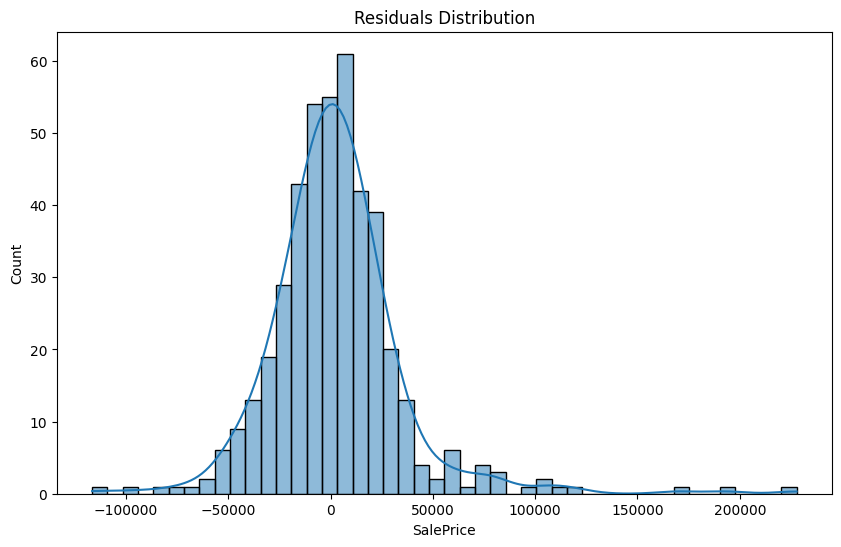

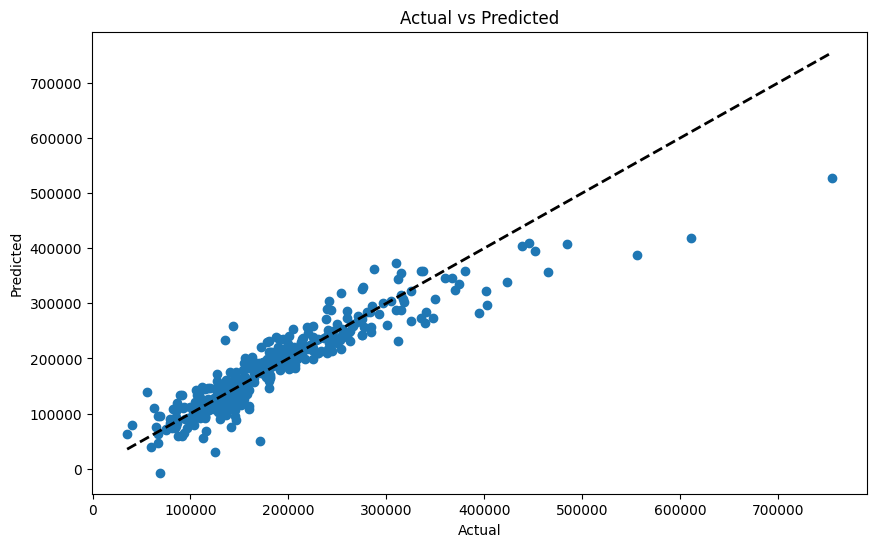

In [184]:

# Instantiate the model
model_1 = LinearRegression()
# Train the model
model_1.fit(X_train_1, y_train_1)
# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_1)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_1, y_pred_1)
r2 = r2_score(y_test_1, y_pred_1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting residuals
residuals = y_test_1 - y_pred_1
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_1, y_pred_1)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [185]:

# Remove outliers using 3-sigma method
def remove_outliers(df, column):
  """
  Removes outliers from a DataFrame column using the 3-sigma method.

  Args:
    df: The DataFrame.
    column: The name of the column to remove outliers from.

  Returns:
    A new DataFrame with outliers removed.
  """
  mean = df[column].mean()
  std = df[column].std()
  lower_bound = mean - 3 * std
  upper_bound = mean + 3 * std
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the 'SalePrice' column
df = remove_outliers(df, 'SalePrice')


In [186]:
# Extract the target variable
y = df['SalePrice']

# Drop the column with the target variable
X = df.drop(['SalePrice'], axis=1)

Mean Squared Error: 683552891.36
R-squared: 0.844456924871504


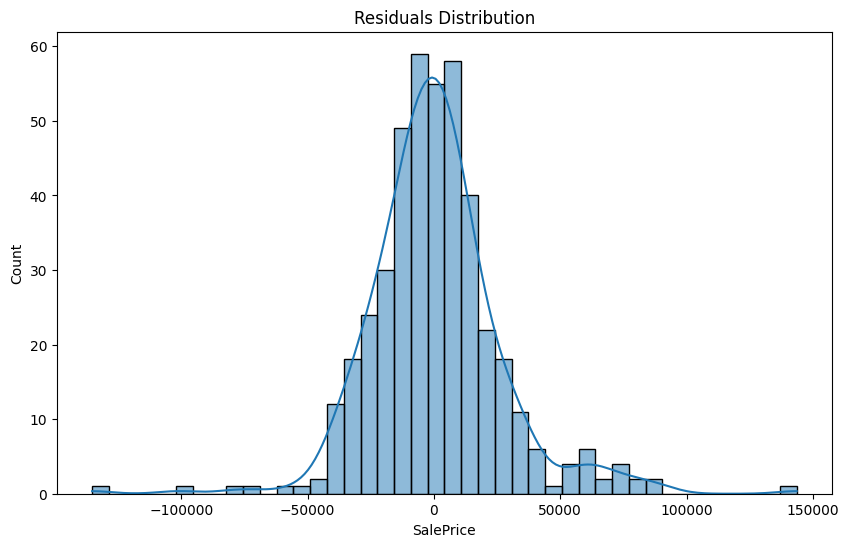

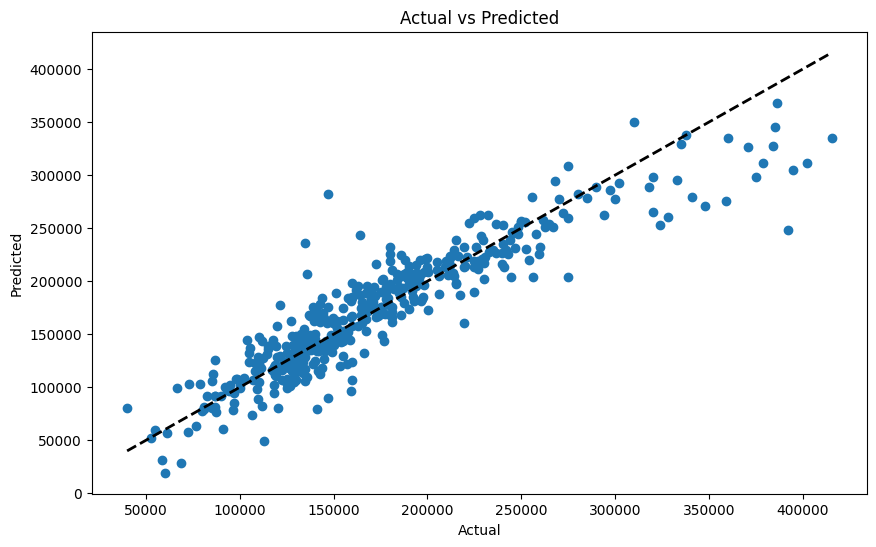

In [214]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
model_1 = LinearRegression()
# Train the model
model_1.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model_1.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {round(mse,2)}')
print(f'R-squared: {r2}')

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


#### Ridge Regression

In [188]:
#Giving values of alpha from 10^-2 to 10^7
#taking 50 samples. you can take no of samples similar to no of columns/features present in your dataset
alphas = np.logspace(-2, 7, 50)
alphas

array([1.00000000e-02, 1.52641797e-02, 2.32995181e-02, 3.55648031e-02,
       5.42867544e-02, 8.28642773e-02, 1.26485522e-01, 1.93069773e-01,
       2.94705170e-01, 4.49843267e-01, 6.86648845e-01, 1.04811313e+00,
       1.59985872e+00, 2.44205309e+00, 3.72759372e+00, 5.68986603e+00,
       8.68511374e+00, 1.32571137e+01, 2.02358965e+01, 3.08884360e+01,
       4.71486636e+01, 7.19685673e+01, 1.09854114e+02, 1.67683294e+02,
       2.55954792e+02, 3.90693994e+02, 5.96362332e+02, 9.10298178e+02,
       1.38949549e+03, 2.12095089e+03, 3.23745754e+03, 4.94171336e+03,
       7.54312006e+03, 1.15139540e+04, 1.75751062e+04, 2.68269580e+04,
       4.09491506e+04, 6.25055193e+04, 9.54095476e+04, 1.45634848e+05,
       2.22299648e+05, 3.39322177e+05, 5.17947468e+05, 7.90604321e+05,
       1.20679264e+06, 1.84206997e+06, 2.81176870e+06, 4.29193426e+06,
       6.55128557e+06, 1.00000000e+07])

(50, 79)


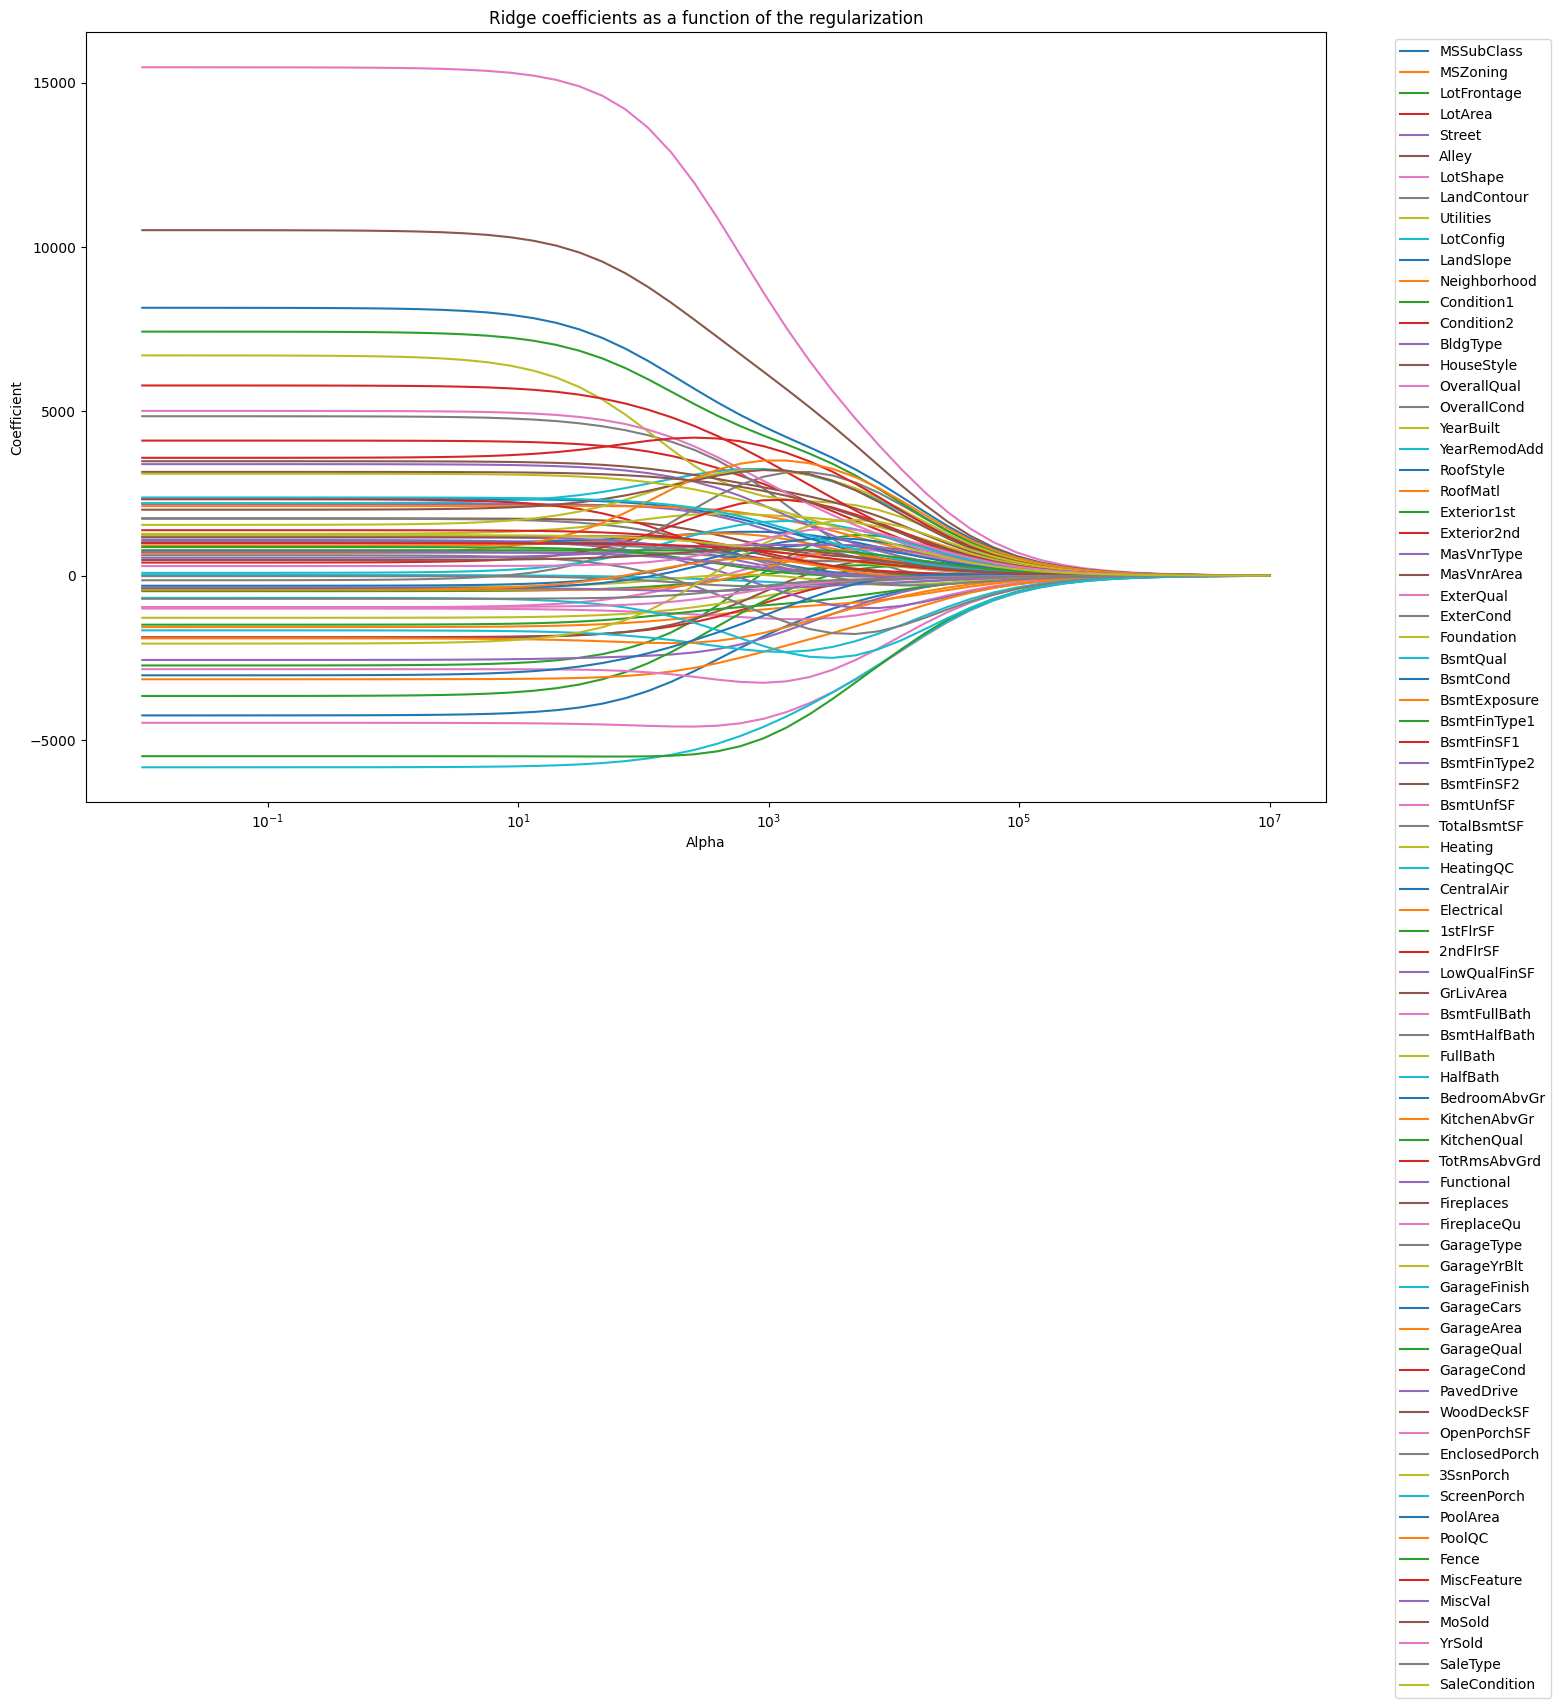

In [189]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Ridge regression for different alpha values and store the coefficients
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

# Convert Coefficients to NumPy Array and Check Shape:
# coefs = np.array(coefs) converts the list of coefficients (coefs) into a NumPy array for easier manipulation.
# print(np.shape(coefs)) prints the shape of the coefficients array.
# This should be a 2D array with the first dimension representing the number of alpha values
# used and the second dimension representing the number of features in your data X.

coefs = np.array(coefs)
print(np.shape(coefs))

# Optionally, you can also visualize the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
for i in range(coefs.shape[1]):
    # plots the coefficients for each feature (column) in X as a function of the alpha values. The label argument is used for the legend.
    plt.plot(alphas, coefs[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [190]:
#  X-axis:
# Alpha (regularization parameter) on a logarithmic scale. Alpha values range from 10^-4 to 10^4.

# Y-axis:
# Coefficient values, ranging from -25000 to 15000.

# Lines:
# Each line represents the coefficient values for a single feature in the dataset as the regularization parameter (alpha) increases.

# # Interpretation:

# High Alpha Values (Left Side):
# At high alpha values (strong regularization), most coefficients are close to zero. This is because Ridge regression shrinks the coefficients towards zero to prevent overfitting.

#  Low Alpha Values (Right Side):
# As alpha decreases (weaker regularization), the coefficients become larger in magnitude. Some coefficients even change sign, indicating that the direction of their influence on the target variable has reversed.

# Wide Range of Coefficient Values:
# The plot shows a wide range of coefficient values for different features, indicating varying degrees of importance.
# Some features have coefficients that are consistently large across all alpha values, suggesting their strong influence on the target variable. Others have coefficients that are close to zero for most alpha values, indicating their limited impact.

In [191]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [192]:
# Fit Ridge regression models with the best alpha, alpha = 0 (chances of overfitting),  and alpha = 10^10 (chances of underfitting)
ridge1 = Ridge(alpha=0)
ridge1.fit(X_train_scaled, y_train)
pred1 = ridge1.predict(X_test_scaled)
mse1 = mean_squared_error(y_test, pred1)
print(f"Mean Squared Error with normalize=True for alpha ({0}): {mse1}")


ridge2 = Ridge(alpha=10**10)
ridge2.fit(X_train_scaled, y_train)
pred2 = ridge2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, pred2)
print(f"Mean Squared Error with normalize=True for alpha ({10**10}): {mse2}")

Mean Squared Error with normalize=True for alpha (0): 699453545.573533
Mean Squared Error with normalize=True for alpha (10000000000): 4409902481.912075


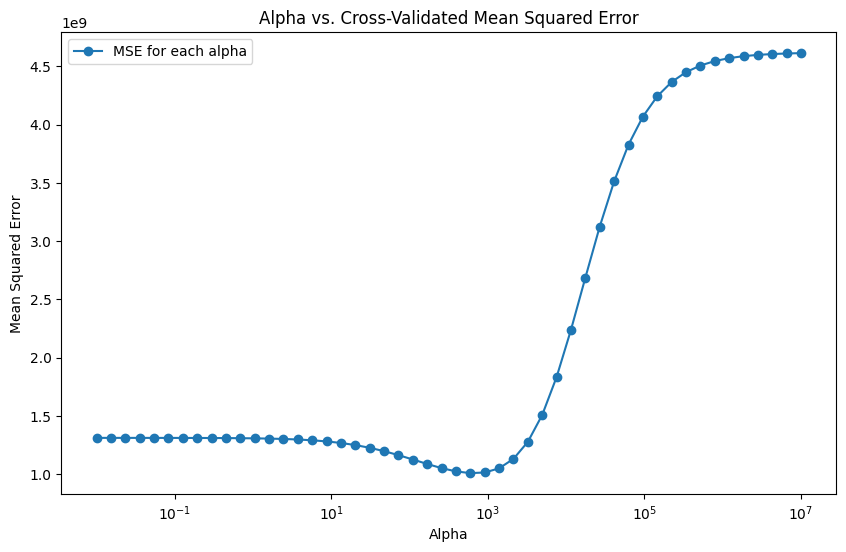

Best alpha from RidgeCV: 596.3623316594649
Mean Squared Error with best alpha: 656276723.5819831


In [193]:
# if we gave our alpha a small value it might do overfiting and if we gave our alpha a large value it will do underfitting.
# So the solution is that, we have to find the best alpha

# Initialize and fit RidgeCV to find the best alpha
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)

# Choosing the best alpha
best_alpha_ridge = ridgecv.alpha_

# Calculate the cross-validated MSE for each alpha
mse_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())

# Plot the alphas against their respective MSEs
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', label='MSE for each alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs. Cross-Validated Mean Squared Error')
plt.legend()
plt.show()


# Fit Ridge regression with the best alpha from RidgeCV
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train_scaled, y_train)
pred_best = ridge_best.predict(X_test_scaled)
mse_best_R = mean_squared_error(y_test, pred_best)
print(f"Best alpha from RidgeCV: {best_alpha_ridge}")
print(f"Mean Squared Error with best alpha: {mse_best_R}")

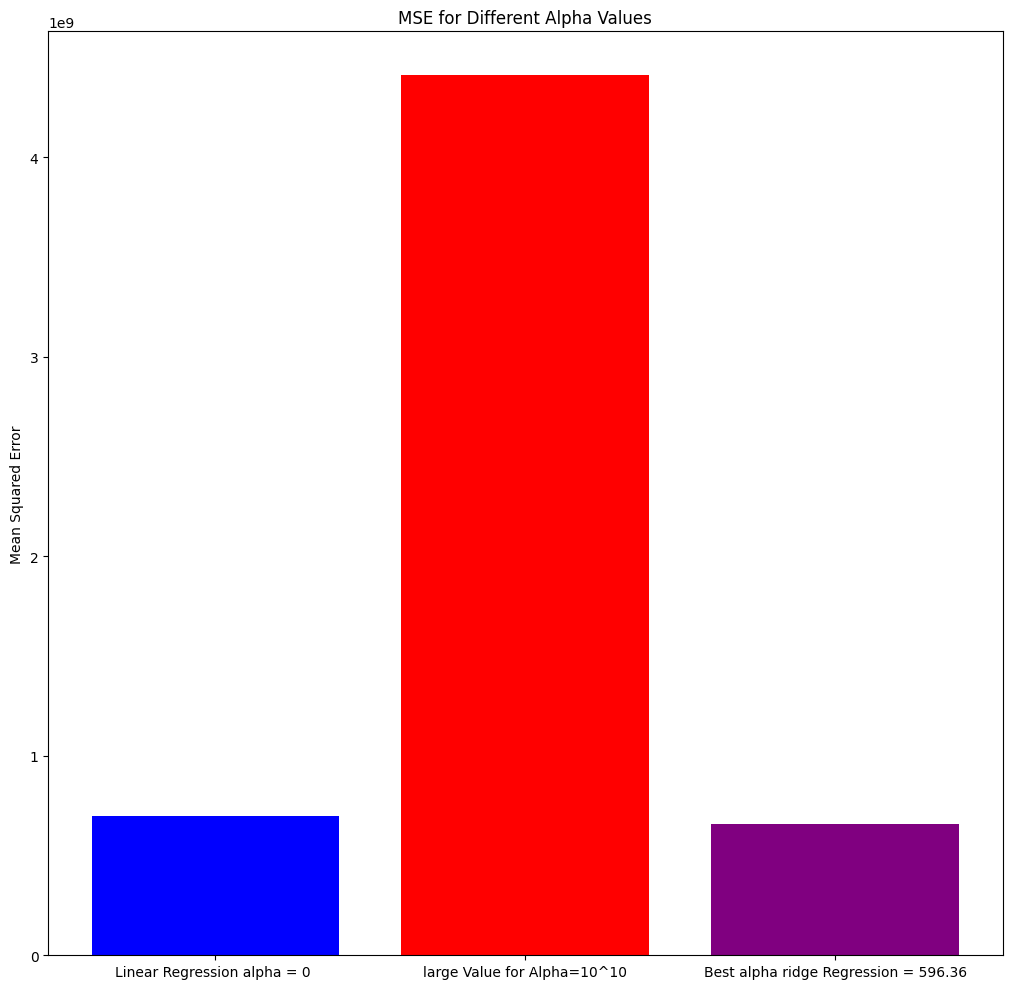

In [194]:

plt.figure(figsize=(20, 10))
# Plot the MSE
mse_values = [mse1,  mse2, mse_best_R]
alpha_labels = ['Linear Regression alpha = 0 ',  'large Value for Alpha=10^10', f'Best alpha ridge Regression = {round(best_alpha_ridge,2)}']

plt.subplot(1, 2, 2)
plt.bar(alpha_labels, mse_values, color=['blue',  'red', 'purple'])
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Alpha Values')

plt.tight_layout()
plt.show()

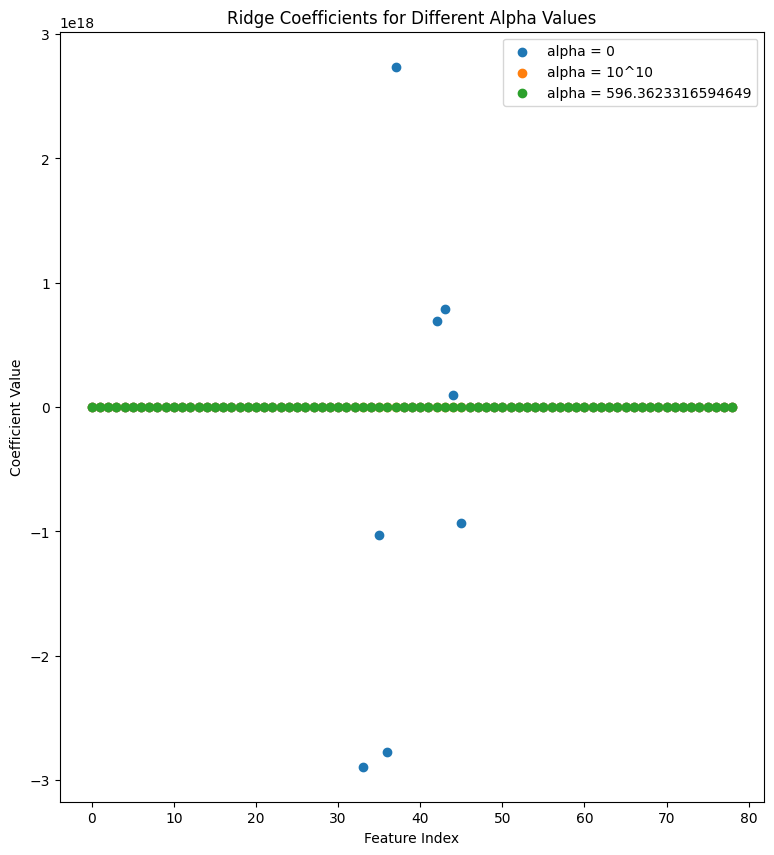

In [195]:

plt.figure(figsize=(20, 10))

# Create the scatter plots for each set of coefficients
plt.subplot(1, 2, 1)
plt.scatter(range(len(ridge1.coef_)), ridge1.coef_, marker='o', label='alpha = 0')
plt.scatter(range(len(ridge2.coef_)), ridge2.coef_, marker='o', label='alpha = 10^10')
plt.scatter(range(len(ridge_best.coef_)), ridge_best.coef_, marker='o', label=f'alpha = {best_alpha_ridge}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()

plt.show()

#### Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+10, tolerance: 6.543e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+10, tolerance: 6.543e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+10, tolerance: 6.543e

(50, 79)


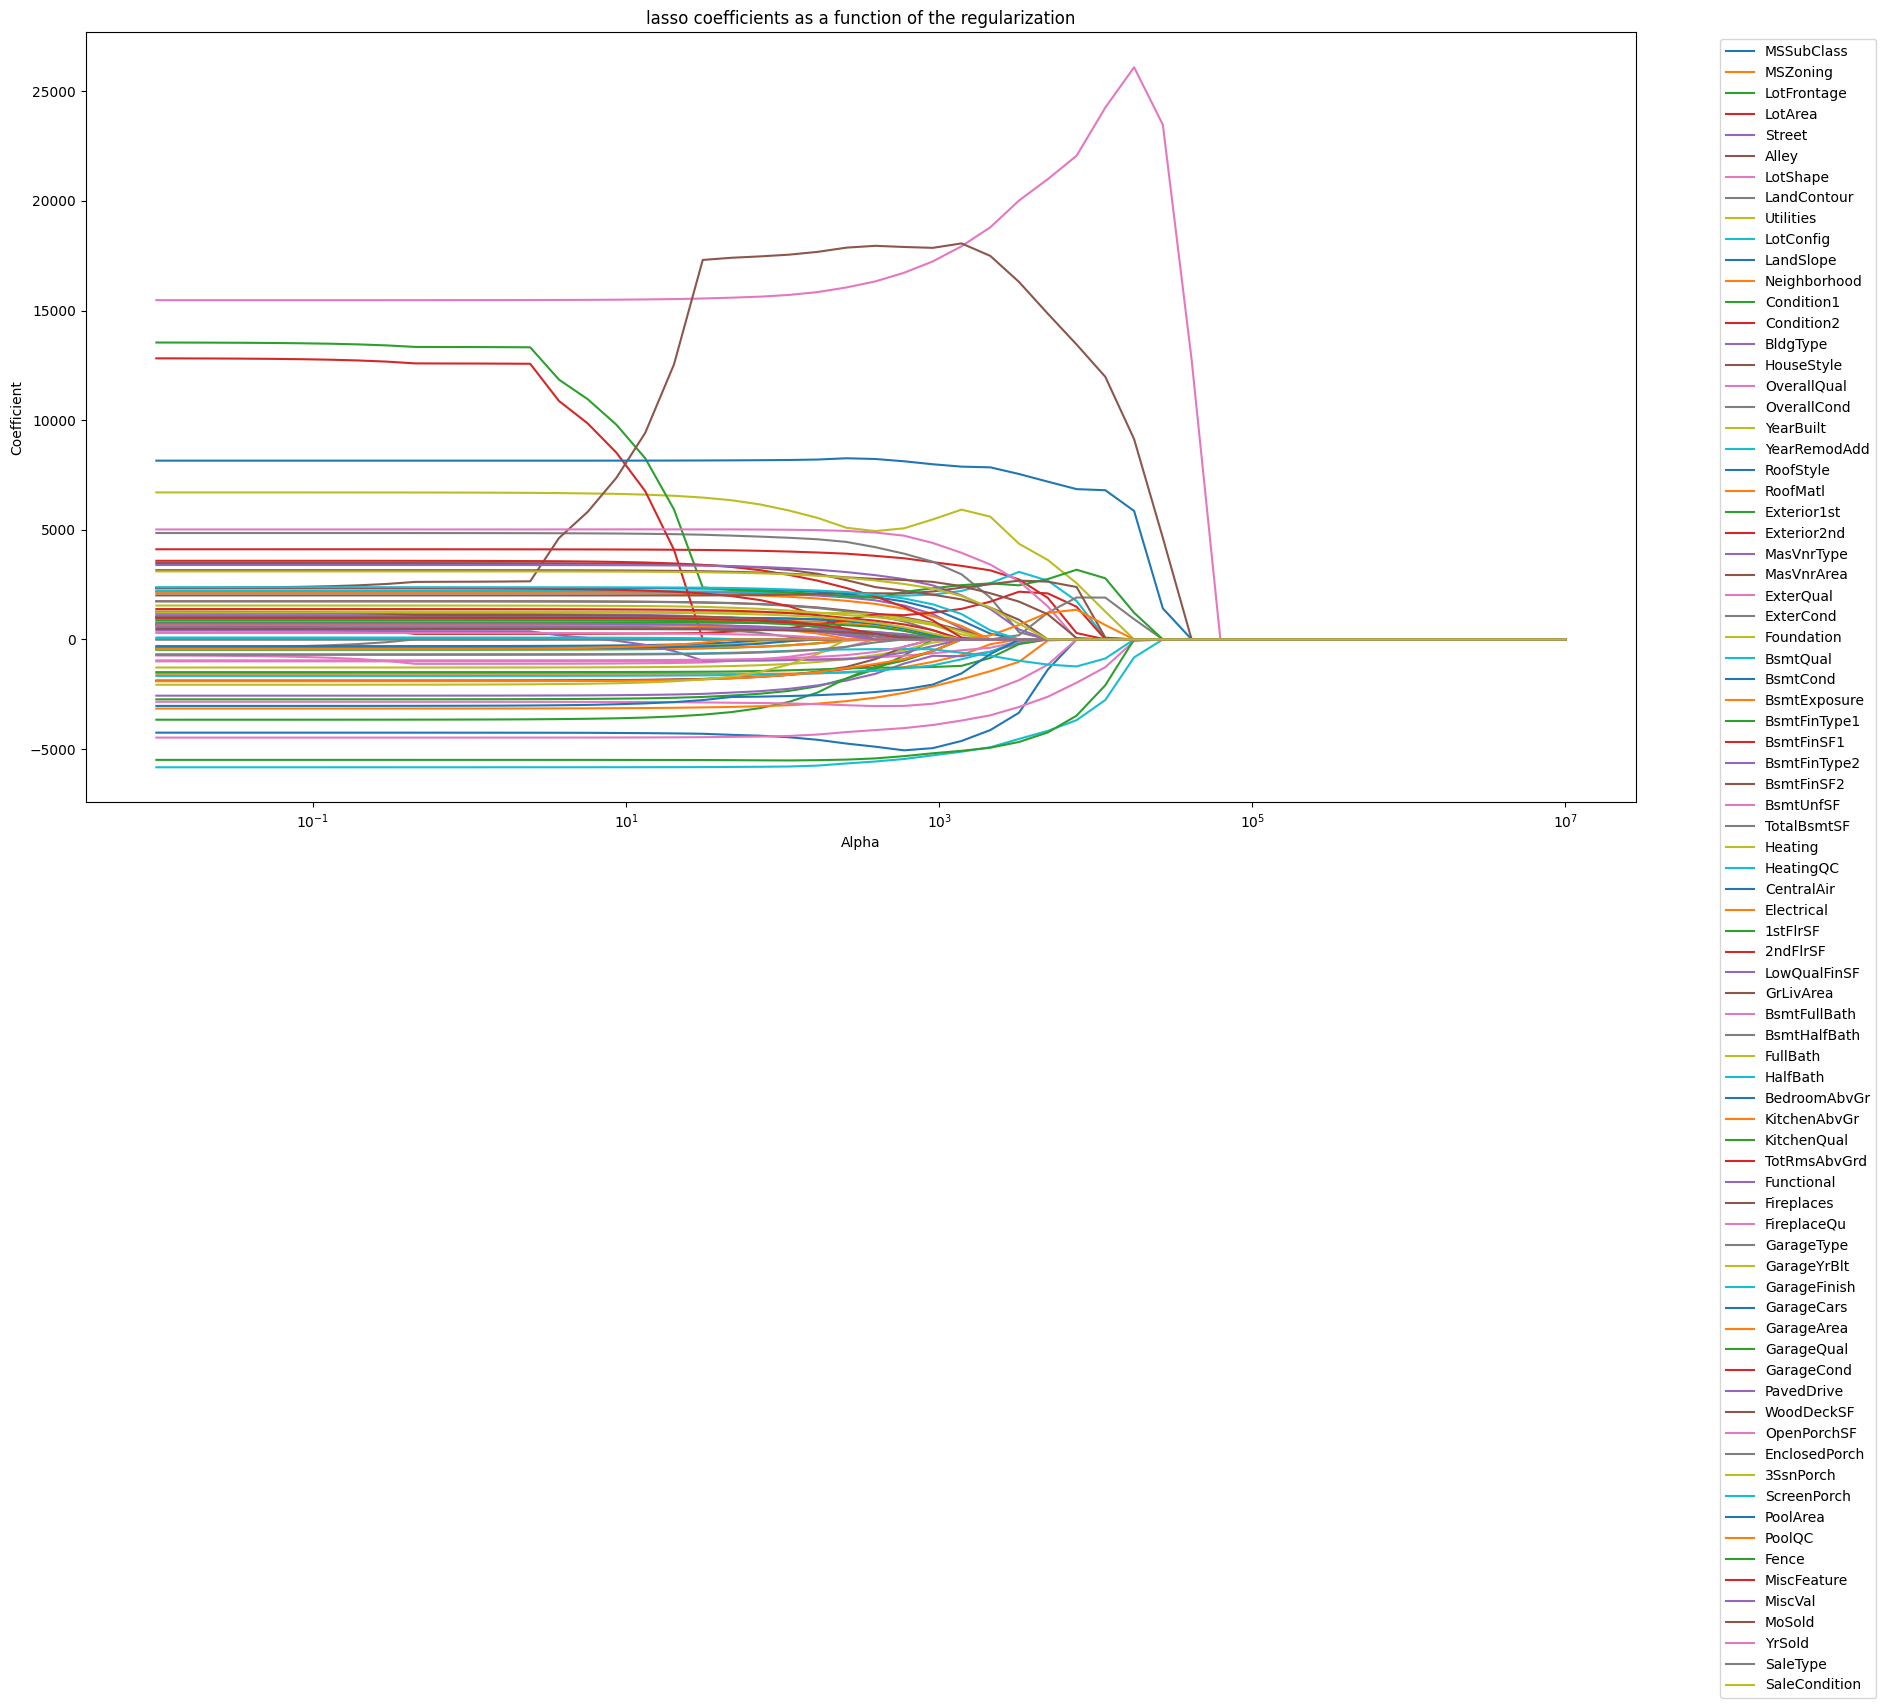

In [196]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform lasso regression for different alpha values and store the coefficients
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

# Convert the list of coefficients to a numpy array and check its shape
coefs = np.array(coefs)
print(np.shape(coefs))

# Optionally, you can also visualize the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('lasso coefficients as a function of the regularization')
# plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


In [197]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit lasso regression models with the best alpha, alpha = 0,  and alpha = 10^10
lasso1 = Lasso(alpha=0)
lasso1.fit(X_train_scaled, y_train)
predl1 = lasso1.predict(X_test_scaled)
msel1 = mean_squared_error(y_test, predl1)
print(f"Mean Squared Error with normalize=True for alpha ({0}): {msel1}")


lasso2 = Lasso(alpha=10**10)
lasso2.fit(X_train_scaled, y_train)
predl2 = lasso2.predict(X_test_scaled)
msel2 = mean_squared_error(y_test, predl2)
print(f"Mean Squared Error with normalize=True for alpha ({10**10}): {msel2}")

Mean Squared Error with normalize=True for alpha (0): 683552891.364621
Mean Squared Error with normalize=True for alpha (10000000000): 4409909723.617135


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.295e+11, tolerance: 4.640e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.373e+09, tolerance: 3.801e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.040e+09, tolerance: 3.705e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+09, tolerance: 3.609e

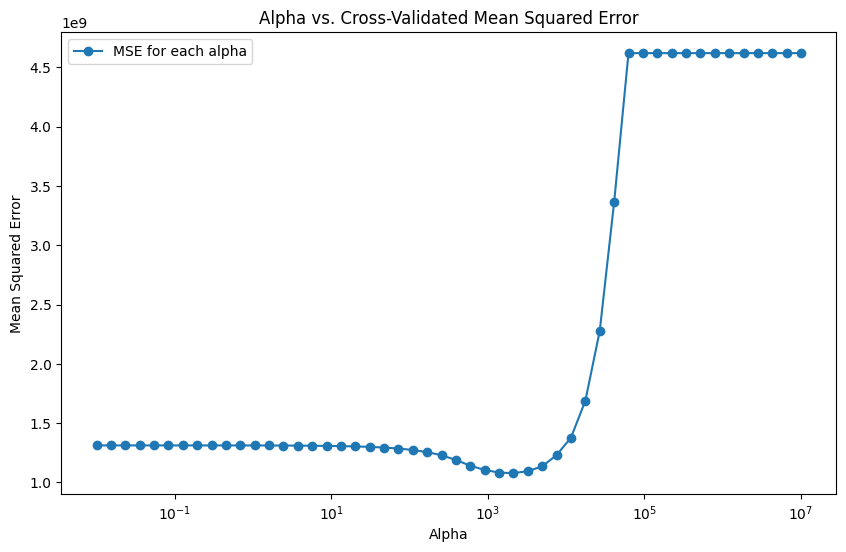

Best alpha from LassoCV: 2120.9508879201926
Mean Squared Error with best alpha: 651383806.99752


In [198]:
# Initialize and fit LassoCV to find the best alpha
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lassocv.fit(X_train_scaled, y_train)

# Print the best alpha
best_alpha_l = lassocv.alpha_

# Calculate the cross-validated MSE for each alpha
mse_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    scores = cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())

# Plot the alphas against their respective MSEs
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', label='MSE for each alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs. Cross-Validated Mean Squared Error')
plt.legend()
plt.show()

# Fit Lasso regression with the best alpha from LassoCV
lasso_best = Lasso(alpha=best_alpha_l, max_iter=10000)
lasso_best.fit(X_train_scaled, y_train)
pred_best = lasso_best.predict(X_test_scaled)
mse_best_l = mean_squared_error(y_test, pred_best)
print(f"Best alpha from LassoCV: {best_alpha_l}")
print(f"Mean Squared Error with best alpha: {mse_best_l}")

In [199]:
pred_best_tr = lasso_best.predict(X_train_scaled)
mse_best_tr = mean_squared_error(y_train, pred_best_tr)

# Print coefficients and MSE for the best alpha model
print("\nLasso Regression with best alpha from LassoCV coefficients:")
print(pd.Series(lasso_best.coef_, index=X.columns))
print(f"Test Mean Squared Error for best alpha ({best_alpha_l}): {mse_best_l}")

print(f"Train Mean Squared Error for best alpha ({best_alpha_l}): {mse_best_tr}")


Lasso Regression with best alpha from LassoCV coefficients:
MSSubClass      -5034.450928
MSZoning         -408.737033
LotFrontage        -0.000000
LotArea           491.240093
Street            152.163797
                    ...     
MiscVal             0.000000
MoSold              0.000000
YrSold             -0.000000
SaleType            0.000000
SaleCondition    1804.492397
Length: 79, dtype: float64
Test Mean Squared Error for best alpha (2120.9508879201926): 651383806.99752
Train Mean Squared Error for best alpha (2120.9508879201926): 775871668.9459363


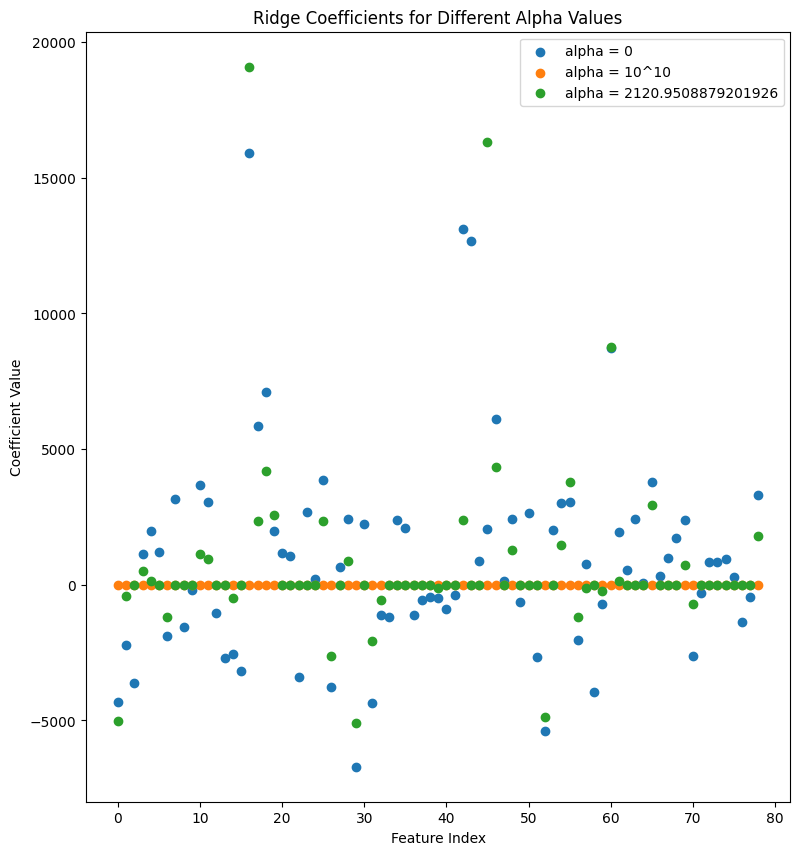

In [200]:

plt.figure(figsize=(20, 10))

# Create the scatter plots for each set of coefficients
plt.subplot(1, 2, 1)
plt.scatter(range(len(lasso1.coef_)), lasso1.coef_, marker='o', label='alpha = 0')
plt.scatter(range(len(lasso2.coef_)), lasso2.coef_, marker='o', label='alpha = 10^10')
plt.scatter(range(len(lasso_best.coef_)), lasso_best.coef_, marker='o', label=f'alpha = {best_alpha_l}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()

plt.show()

#### Partial least Square

In [201]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp) #Creates a PLS model with n_comp components.

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10) #Performs 10-fold cross-validation.

    # Calculate scores
    r2_PLS = r2_score(y, y_cv) #Calculates R² score.
    mse_PLS = mean_squared_error(y, y_cv) #Calculates Mean Squared Error
    rpd = y.std()/np.sqrt(mse_PLS) #Calculates Residual Prediction Deviation.

    return (y_cv, r2_PLS, mse_PLS, rpd)

In [202]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
# test with 40 components and finding the optimal number of components
r2s = []
mse = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2_PLS, mse_PLS, rpd = optimise_pls_cv(X_train_scaled, y_train, n_comp)
    r2s.append(r2_PLS)
    mse.append(mse_PLS)
    rpds.append(rpd)

In [204]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

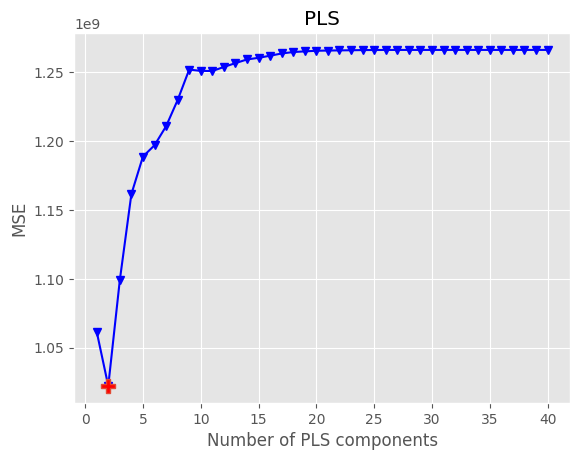

In [205]:
plot_metrics(mse, 'MSE', 'min')

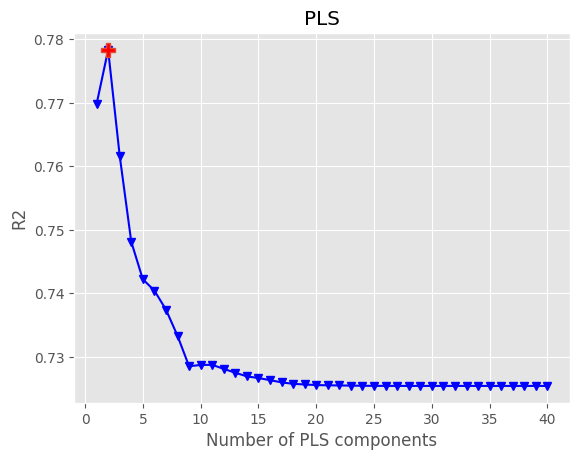

In [206]:
plot_metrics(r2s, 'R2', 'max')

In [207]:
# 2 components are optimum
y_cv, r2_PLS, mse_PLS, rpd = optimise_pls_cv(X_train_scaled, y_train, 2)

In [208]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2_PLS, mse_PLS, rpd))

R2: 0.7783, MSE: 1022272218.7285, RPD: 2.1251


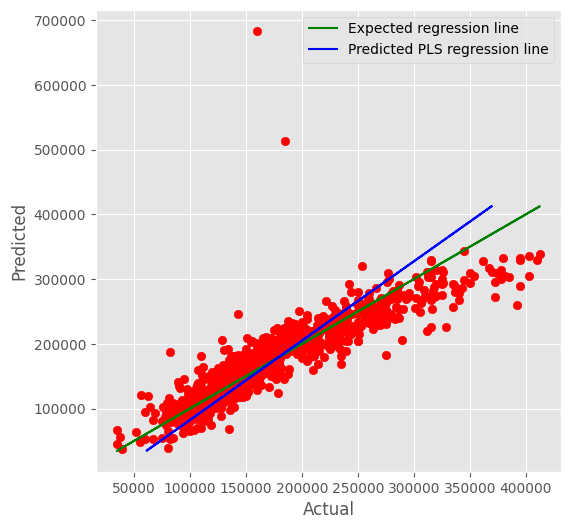

In [209]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_train, y_cv, color='red')
    plt.plot(y_train, y_train, '-g', label='Expected regression line')
    z = np.polyfit(y_train, y_cv, 1)
    plt.plot(np.polyval(z, y_train), y_train, color='blue', label='Predicted PLS regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

#### Principle Component Analysis

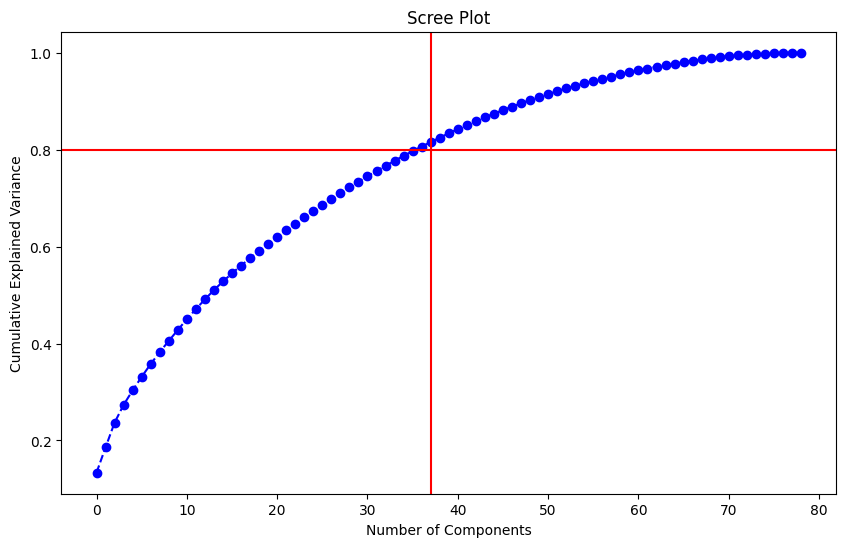

Number of components explaining 80% of the variance: 37
Train MSE: 818600500.1466324, Train R2: 0.8225018222655929
Test MSE: 660530430.5106158, Test R2: 0.8496957065422037


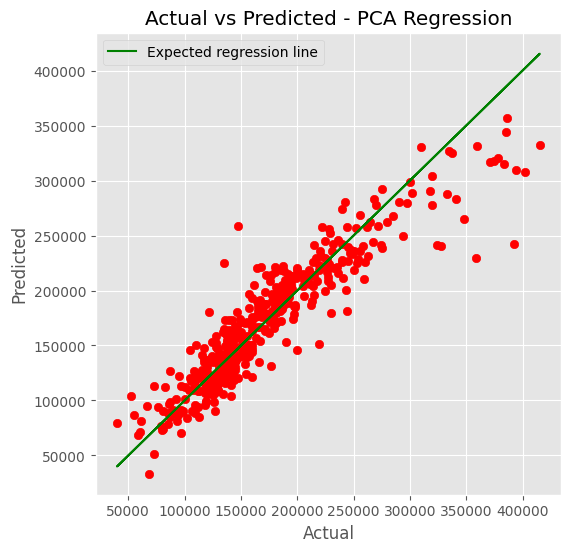

In [210]:
# Apply PCA and fit it on the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axvline(x=np.argmax(np.cumsum(explained_variance) >= 0.80) + 1, color='r', linestyle='-')
plt.show()

# Determine the number of components that explain 80% of the variance
n_components_80 = np.argmax(np.cumsum(explained_variance) >= 0.80) + 1
print(f"Number of components explaining 80% of the variance: {n_components_80}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components_80)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# In[9]:

# Apply linear regression on PCA-transformed data
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

# Predictions
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

# Calculate metrics
train_mse_PCA = mean_squared_error(y_train, y_train_pred)
test_mse_PCA = mean_squared_error(y_test, y_test_pred)
train_r2_PCA = r2_score(y_train, y_train_pred)
test_r2_PCA = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse_PCA}, Train R2: {train_r2_PCA}')
print(f'Test MSE: {test_mse_PCA}, Test R2: {test_r2_PCA}')

# In[10]:

# Plotting actual vs predicted
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_test_pred, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted - PCA Regression')
    plt.legend()
    plt.show()

#### Comparison of MSE values for all the models

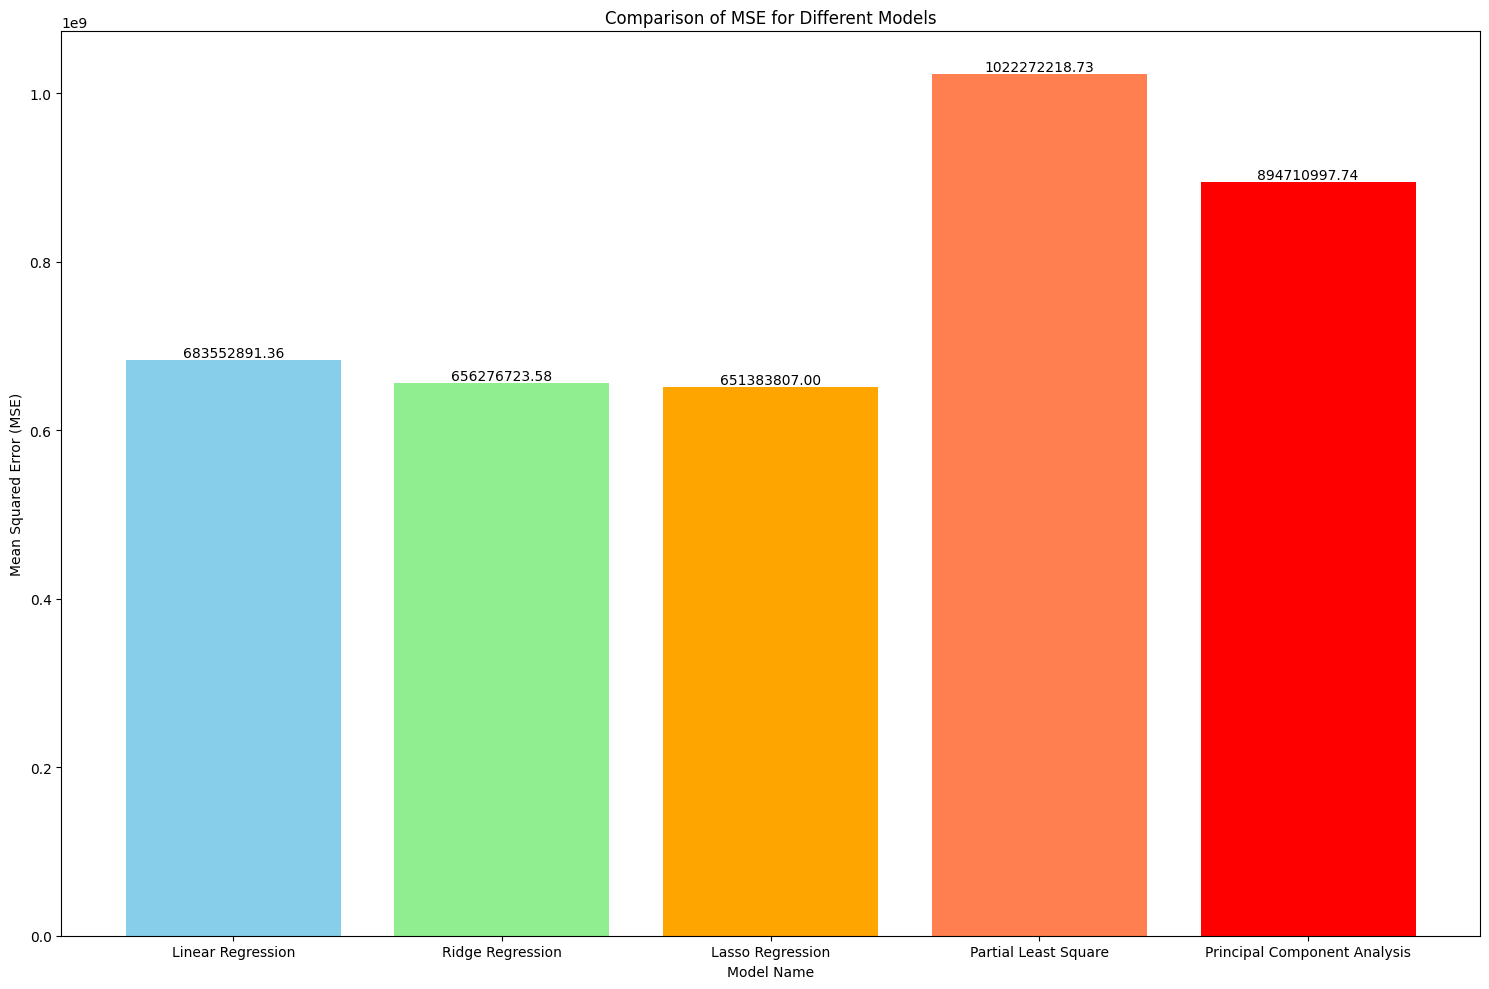

In [217]:
# Sample MSE values for different models
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Partial Least Square','Principal Component Analysis']
mse_values = [mse , mse_best_R , mse_best_l , mse_PLS, test_mse_PCA ]  # Replace with your actual MSE values

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.bar(model_names, mse_values, color=['skyblue', 'lightgreen', 'orange', 'coral','red'])
plt.xlabel('Model Name')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Models')

# Display the MSE values on top of each bar
for idx, value in enumerate(mse_values):
    plt.text(idx, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Conclusion

In [ ]:
# the above barchart This bar chart compares the Mean Squared Error (MSE) of five different regression models. MSE is a measure of how well a model fits the data. Lower MSE values generally indicate a better fit.
# Based on the chart, Lasso Regression appears to be the best-performing model in terms of minimizing the error, while Partial Least Squares has the largest error.